# [AI 이노베이션 스퀘어] 12기 고급 시각반
- github: https://github.com/hysKim1/AI_Vision
    - [파이썬 공식문서]https://docs.python.org/ko/3/
    - [Numpy 공식문서]https://numpy.org/devdocs/
    - [ML]https://developers.google.com/machine-learning/crash-course/ml-intro?hl=ko
    - [DL]https://www.tensorflow.org/?hl=ko
    
    
---
* [영상처리를 위한 딥러닝1](#영상처리를-위한-딥러닝1)
    * [Sub Sampling](#Sub-Sampling)
      * [ holdout](#holdout)
          * [분할 비율](#분할-비율)
          * [Scikit: train_test_split](#Scikit:-train_test_split)
          * [keras: load_data](#keras:-load_data)
          * [stratification](#stratification)
      * [Learning Curve](#Learning-Curve)
  * [모델 만드는법](#모델-만드는법)
      * [Sequential](#Sequential)
  * [compile](#compile)
      * [loss](#loss)
      * [optimizer](#optimizer)
  * [성능 향상을 위한 전처리: 정규화](#성능-향상을-위한-전처리:-정규화)
      * [MinMaxScaler](#MinMaxScaler)
  * [fashion_mnist](#fashion_mnist)

  모델 만드는법

---
## 영상처리를 위한 딥러닝1

In [1]:
import tensorflow as tf

`set_log_device_placement`
- 연산과 텐서가 어떤 장치(CPU/GPU)에 할당되었는지 확인
- 활성화하면 모든 텐서나 연산 할당이 출력
- GPU 있는 사람들에게 유용

In [ ]:
tf.debugging.set_log_device_placement(True) #활성화 

- 데이터를 가져와야함
- tf, pytorch는  Numpy와 호환이 잘 되나 Numpy에서 tensor로 바꾸는데 overhead생김

In [2]:
dir(tf) # __array__  -> Numpy와 호환됨 -수많은 subpackage로 구성됨

['AggregationMethod',
 'Assert',
 'CriticalSection',
 'DType',
 'DeviceSpec',
 'GradientTape',
 'Graph',
 'IndexedSlices',
 'IndexedSlicesSpec',
 'Module',
 'Operation',
 'OptionalSpec',
 'RaggedTensor',
 'RaggedTensorSpec',
 'RegisterGradient',
 'SparseTensor',
 'SparseTensorSpec',
 'Tensor',
 'TensorArray',
 'TensorArraySpec',
 'TensorShape',
 'TensorSpec',
 'TypeSpec',
 'UnconnectedGradients',
 'Variable',
 'VariableAggregation',
 'VariableSynchronization',
 '_API_MODULE',
 '_LazyLoader',
 '__all__',
 '__builtins__',
 '__cached__',
 '__compiler_version__',
 '__cxx11_abi_flag__',
 '__doc__',
 '__file__',
 '__git_version__',
 '__loader__',
 '__monolithic_build__',
 '__name__',
 '__operators__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_absolute_import',
 '_api',
 '_compat',
 '_current_file_location',
 '_current_module',
 '_distutils',
 '_division',
 '_estimator_module',
 '_fi',
 '_inspect',
 '_ll',
 '_logging',
 '_main_dir',
 '_major_api_version',
 '_module_dir',
 '

### 연습용 데이터
- keras.datasets
    - 전통적인 방법: 데이터 Numpy형태
        - 흑백 mnist, fashion_mnist 
        - 컬러 cifar10,cifar100
- tensorflow_datasets
    - https://www.tensorflow.org/datasets?hl=ko
- AI hub

In [ ]:
tf.keras.datasets.

In [3]:
len(tf.keras.datasets.mnist.load_data()) #2개로 unpacking가능

2

## Sub Sampling
- resmapling의 하나로 중복을 허용하지 않는 샘플링 기법
### holdout
- 데이터가 많은 경우 데이터를 나누어 데이터 기반의 주관적 성능 측정을 위해서 생성된 모델로 검증
    - 2-way :train,test
        - train: 모델 학습에 사용되는 훈련 세트:
        - test: 모델 검정을 위한 unseen data에 대한 일반화된 성능 측정 
    - 3-way : train,test, validation
        - validation set: hyperparameter tunning을 목적으로 train 데이터에서 가져옴
            - `keras` 내부적으로 3way 자체적 제공
       
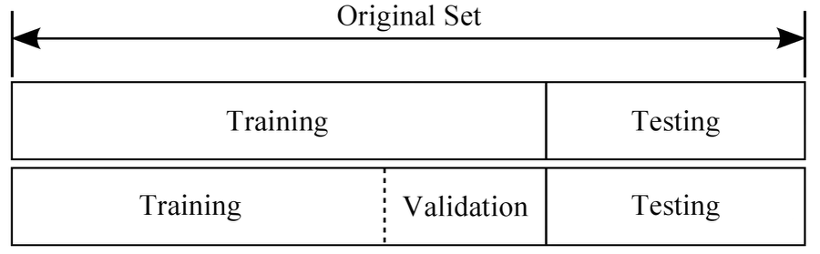
        
- 하이퍼파라미터를 가지고 hold-out하지 않고 **가용할 수 있는 모든 데이터로 최종 학습**
- 샘플이 독립적이고 동일한 분포를 갖는다는 i.i.d (independent and identically distributed) 가정
    - 가정에 의해 전체 데이터를 다시 최종학습에 사용하면 일반화 성능이 더 좋아짐 
   > 데이터가 적은 경우 cross-validation
### 분할 비율
- 데이터가 아주 많으면 큰 문제는 없지만 데이터가 작은경우에 분할비율이 문제가 됨
  - bias vs variance trade-off
    - 비관적 편향: train set < test set
        - 모델이 미처 최대 성능 한계에 도달하지 않음
    - test data가 적으면 오차에 따라서 정확도에대한 분산도 커짐

- shuffle 랜덤하게 데이터 순서를 섞어서 독립성 보장

- tf.keras
    - 대부분이 자동으로 되어있음
- scikit-laern
    - 직접 strafity설정 해야함
---
### Scikit: train_test_split
- 참고용


pop
- mutable technique
    -  자기자신 바뀌고 return 있음
    - data, target 구분

In [5]:
import seaborn as sns

In [6]:
iris= sns.load_dataset('iris')
iris_species=iris.pop('species')  #y값 

In [7]:
iris                     #feature

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [8]:
iris.dropna() #결측치 제거

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [9]:
iris.tail()

,sepal_length,sepal_width,petal_length,petal_width
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
149,5.9,3.0,5.1,1.8


In [10]:
iris.sample(frac=0.8) #80%의 데이터를 랜덤하게 뽑음

,sepal_length,sepal_width,petal_length,petal_width
108,6.7,2.5,5.8,1.8
30,4.8,3.1,1.6,0.2
15,5.7,4.4,1.5,0.4
120,6.9,3.2,5.7,2.3
23,5.1,3.3,1.7,0.5
...,...,...,...,...
80,5.5,2.4,3.8,1.1
86,6.7,3.1,4.7,1.5
71,6.1,2.8,4.0,1.3
73,6.1,2.8,4.7,1.2


`train_test_split`
- 정형데이에서 왕
- 기본적으로 순서 섞어서 train,test 분할
- 층화샘플링은 옵션으로 선택

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
test,train= train_test_split(iris.iloc[:,:-1],
                            test_size=0.9) #train:test = 9:1 비율로 unpacking

In [13]:
train  #135

,sepal_length,sepal_width,petal_length
122,7.7,2.8,6.7
134,6.1,2.6,5.6
106,4.9,2.5,4.5
70,5.9,3.2,4.8
128,6.4,2.8,5.6
...,...,...,...
0,5.1,3.5,1.4
136,6.3,3.4,5.6
117,7.7,3.8,6.7
69,5.6,2.5,3.9


In [14]:
test #15

,sepal_length,sepal_width,petal_length
36,5.5,3.5,1.3
86,6.7,3.1,4.7
146,6.3,2.5,5.0
15,5.7,4.4,1.5
46,5.1,3.8,1.6
53,5.5,2.3,4.0
109,7.2,3.6,6.1
115,6.4,3.2,5.3
50,7.0,3.2,4.7
145,6.7,3.0,5.2


In [15]:
train.info(), test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 135 entries, 122 to 38
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  135 non-null    float64
 1   sepal_width   135 non-null    float64
 2   petal_length  135 non-null    float64
dtypes: float64(3)
memory usage: 4.2 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 15 entries, 36 to 126
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  15 non-null     float64
 1   sepal_width   15 non-null     float64
 2   petal_length  15 non-null     float64
dtypes: float64(3)
memory usage: 480.0 bytes


(None, None)

`train_test_split(data, shuffle=True)`
- 순서 무작위로 기본값 설정 되어있음

In [16]:
test,train= train_test_split(iris.iloc[:,:-1],
                            test_size=0.9,shuffle=False) #순서대로

In [17]:
train

,sepal_length,sepal_width,petal_length
15,5.7,4.4,1.5
16,5.4,3.9,1.3
17,5.1,3.5,1.4
18,5.7,3.8,1.7
19,5.1,3.8,1.5
...,...,...,...
145,6.7,3.0,5.2
146,6.3,2.5,5.0
147,6.5,3.0,5.2
148,6.2,3.4,5.4


In [22]:
 X_train,X_test,y_train,y_test=train_test_split(iris.iloc[:,:-1],iris_species) 

In [23]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112 entries, 100 to 87
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  112 non-null    float64
 1   sepal_width   112 non-null    float64
 2   petal_length  112 non-null    float64
dtypes: float64(3)
memory usage: 3.5 KB


In [24]:
y_train.value_counts() #갯수 안 맞음

virginica     40
setosa        39
versicolor    33
Name: species, dtype: int64

4개로 unpacking
- 기본 2개로 unpacking하지만 데이터 2개 넣으면 4개

`tain_test_split( stratify= target)`
- spcies 기준 충화 계층 샘플링

In [27]:
 X_train,X_test,y_train,y_test= train_test_split(iris.iloc[:,:-1], iris_species,
                                                stratify=iris_species) 

In [28]:
y_train.value_counts()  #비율 맞음

versicolor    38
virginica     37
setosa        37
Name: species, dtype: int64

tf 연습용 데이터에서도 사용가능

In [29]:
(X_train, y_train),(X_test, y_test)=tf.keras.datasets.mnist.load_data()

In [30]:
data=X_train.reshape(-1,28*28) #1 차원화

In [31]:
 X_train,X_test,y_train,y_test=train_test_split(data,y_train,
                                               stratify=y_train) 

In [32]:
X_train= X_train.reshape(-1,28,28)
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [33]:
# 랜덤하게 fancy 인덱싱
X_train[[0,1,2]]  #fancy indexing

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]], dtype=uint8)

- stratify 는 각 클래스별로 sampling 해야해서 번거로움

In [34]:
import numpy as np
np.where(y_train==1) #1인값만 추출 

(array([    8,     9,    10, ..., 44970, 44996, 44998]),)

### keras: load_data

In [35]:
(X_train,y_train),(X_test,y_test)=tf.keras.datasets.mnist.load_data()#unpacking technique

### stratification
- 계층적 샘플링(층화게층)
- train,test의 데이터셋의 각 클래스의 분포의 균형을 맞추어 추정이 더 좋아짐 
> 큰 수의 법칙
    - 데이터가 많으면 원래 자기 분포에 가까워짐
     - eg. iris 150개 중 3개의 class가 각 50개 씩 있음 (분포를 맞춤)

In [36]:
import numpy as np

In [37]:
np.unique(y_train, return_counts=True) #10,000개중 어느정도 분포를 6,000개 안팎으로 비슷하게 맞춤

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]))

In [38]:
np.unique(y_test, return_counts=True) #test도 거의 맞춰줌

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([ 980, 1135, 1032, 1010,  982,  892,  958, 1028,  974, 1009]))

### data leackage
- 데이터 유출
- 훈련 데이터에 테스트 데이터가 일부 섞이는 경우 발생
    - 중복 데이터 제거
    - 이미지는 고차원이므로 동일한 데이터이기 힘듦
- 낙관적 편향: 학습에 사용한 훈련데이터로 모델 평가하는 재치환 평가resubstitution evaluation하거나 테스트 데이터를 여러번 재사용 하면 낙관적으로 일반화 성능 추정 
    - 과대적합으로 편향 감소하면서 분산 증가

### data shift
- 학습과 테스트 데이터셋의 특성이 다른 경우

모델 평가
- ML/DL에서는 절대적인 수치의 성능을 만드는것은 어려움
- random sampling - 전체를 대표는 할 수는 있지만

몬테카를로 sampling:
- 동일한 데이터를  랜덤하게 k번 분리해서 k개 모델을 만들어 성능 측정 

## Learning Curve
- 모델이 학습이 잘 되고 있는지 진단
- x축에 따라y축 바뀜

- train 학습여부 판단, validation  unseen데이터 통해서 일반화성능 체크


1. 데이터 크기별로
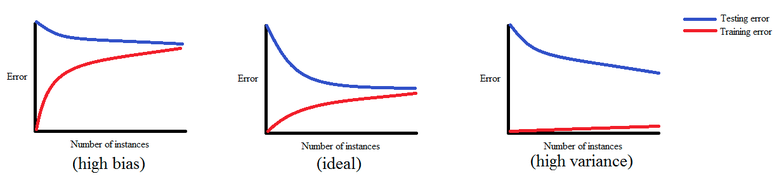
    - 데이터의 크기에 따라서 어떻게 변하는지
        - 데이터 적은 경우 : spark/jittering 있으면 분산이 큼 ->  cross validation 
        - underfiting:  validatoni > train,  train > validation
        - overfitting : validation >train
        - 최적의 모델: train, test score 차이 없으면서 loss 작음 
    - train score: 일반화되면서 과대적합이 감소하면서 감소됨
    - test score: 훈련세트 크기가 커질수록 일반화 정확도 향상

2. epochs 별로 
    - 딥러닝 기법
        - 과소적합 :train data에서 충분히 낮은 Error가 안 나오는 경우
        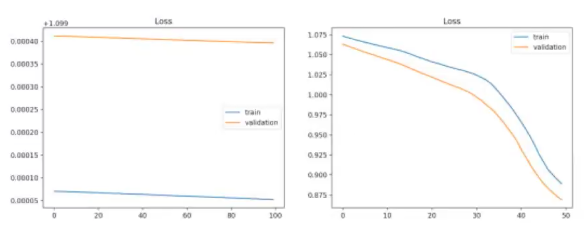
        - 과대적합
        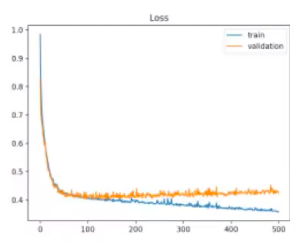
        - 최적:Good fit
        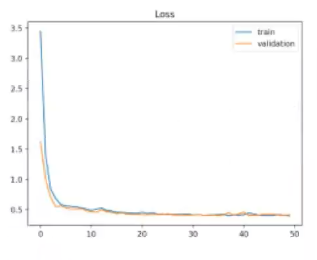
         - test 데이터가 적은 경우
        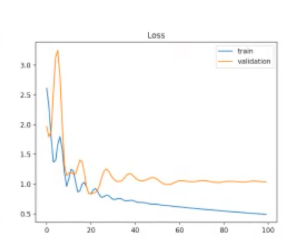
        - test 데이터가 적은 경우
        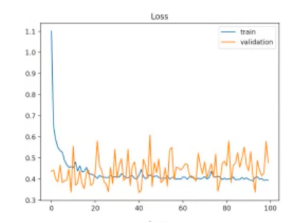

> tensorboard 그래프가 learning curve

참고: https://machinelearningmastery.com/learning-curves-for-diagnosing-machine-learning-model-performance/
 
### cross validation technique
 - 데이터 양이 적은 경우로 딥러닝은 데이터안 씀
     - 데이터가 많다고 가정
     - k개를 연산 시간이 오래걸림
 - 어느정도 데이터가 이정도 같으면 되는지 추정함
 - overfiting 예측 가능

Sequential 모델 작동 파악

In [39]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

- keras 
    - 3-way 지원
    - callback으로 validation 도 나옴

In [44]:
history=model.fit(X_train, y_train, epochs=3, validation_split=0.3 ) #학습->validatoin  순차적

Epoch 1/3
1313/1313 [==============================] - 4s 3ms/step - loss: 0.4755 - accuracy: 0.8668 - val_loss: 0.3555 - val_accuracy: 0.9126
Epoch 2/3
1313/1313 [==============================] - 4s 3ms/step - loss: 0.4514 - accuracy: 0.8775 - val_loss: 0.3197 - val_accuracy: 0.9247
Epoch 3/3
1313/1313 [==============================] - 4s 3ms/step - loss: 0.4056 - accuracy: 0.8885 - val_loss: 0.2719 - val_accuracy: 0.9323


각 loss, accuracy나옴

In [45]:
history

In [46]:
import pandas as pd
pd.DataFrame(history.history )  

,loss,accuracy,val_loss,val_accuracy
0,0.475475,0.866762,0.355533,0.912611
1,0.451361,0.877476,0.319726,0.924667
2,0.405604,0.888524,0.271862,0.932333


한 epoch 당 validation

<AxesSubplot:>

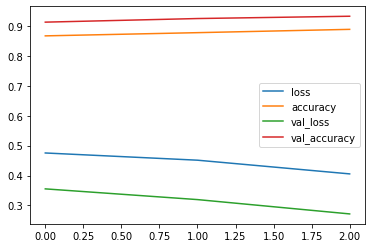

In [47]:
pd.DataFrame(history.history).plot.line() #underfitting 

##  모델 만드는법
5가지
- 혼합 사용 가능 
    1. tensor    tf.nn pytorch에서 차용
    2. estimator scikit-learn에서 차용    
        - 고수준으로 이미 만들어진 것, GPU 지원가능하기 때문에
        - tf에서 공식적으로 Keras API 사용하라고 언급외었고 하위 호환성을 위해 남겨둠
    3. keras Sequential
        - (OOP 객체지향, Declarative)
        - 재사용
        - 선언에 따라서 모델 실행
    4. keras model
        - (OOP+FP)
        - 재사용, 확장성 
    5. keras subclass model
        -  tf2에서 서로 거의 연동되지만 tf1과는 호환이 안되기 때문에 
        - 확장가능성이 많으며 이론과 현실 격차를 줄임
        - 저수준인 tensor로 모든것을 할 필요가 없음
        - 객체지향 방식으로 keras model로 만들었지만 단순한 객체지향 아님
    
### Sequential
- Feed Forward: 앞에서 부터 레이어의 값 전달
- layer 전체를 한꺼번에 관리하는 추상적인 container
- pytroch의 sequential과 비슷함 https://pytorch.org/docs/stable/generated/torch.nn.Sequential.html

In [48]:
model=tf.keras.Sequential()

In [49]:
dir(model) # layers 를 add(추가),내부적 build(구축),compute- 그래프, fit(학습)

['_TF_MODULE_IGNORED_PROPERTIES',
 '__call__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_activity_regularizer',
 '_add_trackable',
 '_add_variable_with_custom_getter',
 '_assert_compile_was_called',
 '_assert_weights_created',
 '_auto_track_sub_layers',
 '_autocast',
 '_autographed_call',
 '_base_model_initialized',
 '_build_graph_network_for_inferred_shape',
 '_build_input_shape',
 '_call_accepts_kwargs',
 '_call_arg_was_passed',
 '_call_fn_arg_defaults',
 '_call_fn_arg_positions',
 '_call_fn_args',
 '_call_full_argspec',
 '_callable_losses',
 '_cast_single_input',
 '_check_call_args',
 '_checkpoint_dependencies',
 '_clear_los

구축 방법 2가지
- `add`로 layer 추가
- `Sequential` 내부에 layer 작성

In [16]:
model=tf.keras.Sequential()
layer1=tf.keras.layers.Dense(64)  #fully connected layer with 64 nodes
model.add(layer1)

In [17]:
model.layers # list형태로 보여줌

In [18]:
model.pop() # FILO transfer learning에서 뒤에서 교체하는 방법으로 사용
model.layers

[]

#### input layer 
- input layer설정 하는 방법4r
- 행렬곱에서 첫 번쨰와 마지막의 행렬 크기가 제일 중요함

In [50]:
model=tf.keras.Sequential()

layer0=tf.keras.layers.Flatten( input_shape=(28,28)) #1차원
layer1= tf.keras.layers.Dense(64, input_shape=(28*28,),name='layer1')#tuple
layer3= tf.keras.layers.Dense(64, input_dim=28*28)   #1차원

layer4=tf.keras.layers.Dense(10,name='layer4') #이름 변경

In [51]:
model.add(layer1) #레이어 하나씩 추가 가능
model.add(layer4)


In [52]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer1 (Dense)               (None, 64)                50240     
_________________________________________________________________
layer4 (Dense)               (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [53]:
tf.keras.backend.clear_session() #모델 기록된거 다 삭제

- 레이어 이름 변경


input layer Flatten 시키는법

In [54]:
X_train.reshape(-1,28*28).shape #

(60000, 784)

activation function 넣는 방법
- 레이어 내부
- Activation으로 따로 

In [55]:
model=tf.keras.Sequential()

flatten=tf.keras.layers.Flatten( input_shape=(28,28))#편의성
layer1= tf.keras.layers.Dense(64,name='layer1',  activation='relu')
layer2=tf.keras.layers.Dense(10, name='layer2' )
activa=tf.keras.layers.Activation('softmax')

In [56]:
model.add(flatten)
model.add(layer1)
model.add(layer2)
model.add(activa)

model.summary() #만든 모델 형태

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
layer1 (Dense)               (None, 64)                50240     
_________________________________________________________________
layer2 (Dense)               (None, 10)                650       
_________________________________________________________________
activation (Activation)      (None, 10)                0         
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


- flatten 학습 안 함
- Param # 학습할 갯수 

In [ ]:
!pip install pydot
!pip install graphviz 

anaconda prompt 
`conda install graphviz`

computaional graph 

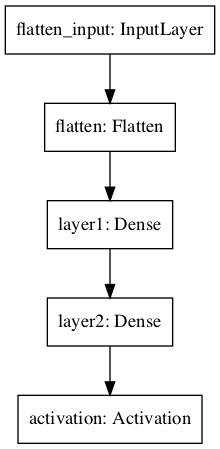

In [57]:
tf.keras.utils.plot_model(model) #모델 시각화

한번에 모양 만들기
- declaration 중요

- declaration 과정을 통해서 topology  모양에 따라 할 수 있는게 달라짐
 - flatten 안, 밖에 할지 정할수 있는데 연산량 문제로 밖에 두는경우도 많음

activation 은 함수형 패러다임 
- 함수 , string을 넣어도 똑같이 작동함
    - tf.nn.relu == 'relu'
    > duck typing

In [58]:
model=tf.keras.Sequential([
    tf.keras.layers.Flatten( input_shape=(28,28)),
    tf.keras.layers.Dense(64,name='layer1',activation=tf.nn.relu), #자동완성
    tf.keras.layers.Dense(10, name='layer2',activation='softmax' ), 
    ])

## compile
### loss
- 목적 : loss 함수 최소화
- 문제 정의에 따라 loss 바뀜
    - 이진분류: `binary_crossentropy`
    - 다중분류(one-hot encoding) :`categorical_crossentropy`
    - 다중분류(label encoding):`sparse_categorical_crossentropy`
        * sparse matrix:희소행렬 : 행렬 내에 0 이 많음
-  자신만의 loss를 만들기 위해서는 이해 필요

### optimizer
-  효율적으로 문제 해결하는 방식
    - learning rate
    - gradient descent
        - adam algorithm은 둘다
    
#### metrics    
- 모델의 목적에 따라서 평가 metric이 바뀜

In [59]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
             metrics=['acc'])

In [60]:
model.fit(X_train,y_train,epochs=5) #누적됨

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 2.1688 - acc: 0.7937
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4618 - acc: 0.8883A: 0s - loss: 0.4697 
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3320 - acc: 0.9131A: 1s - 
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2786 - acc: 0.9250
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2522 - acc: 0.9349


## 성능 향상을 위한 전처리: 정규화
### MinMaxscaler
- 전처리 2가지인  필수적인 전처리와 성능 높이기 위한 전처리가 있는데 정규화는 후자
    - 정규화 0~1사이의 값으로 변환함
    -  $ \frac{x-Min}{Max-Min}= \frac{x}{250}$
    - 신경망은 태생적으로 0~1 의 값으로 넣으면 gradient descent이용 해서 최소값 찾음
        - 정규화 하면 더 연산 속 빨라짐
        - O 에 가까울수록 학습이 빨라짐
        - 이미지는 정규화해도 특성 안 바뀜

#### coercion
- 묵시적 변환때문에 255 or 255.0으로 나누든 동일하게 결과 나옴
- tf기본 데이터 타입 float32로 관례상 float으로 표현함 
https://docs.python.org/ko/3/glossary.html


In [53]:
X_train, X_test = X_train / 255, X_test / 255

In [54]:
model=tf.keras.Sequential([
    tf.keras.layers.Flatten( input_shape=(28,28)),
    tf.keras.layers.Dense(64,name='layer1',activation=tf.nn.relu), 
    tf.keras.layers.Dense(10, name='layer2',activation='softmax' ),
    ])

In [55]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
             metrics=['acc'])

MinMax Scaler가 epoch덜 돌려도 loss가 소수점부터 시작

In [56]:
model.fit(X_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2953 - acc: 0.9164A: 1s - 
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1399 - acc: 0.9592
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1002 - acc: 0.9706
Epoch 4/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0789 - acc: 0.9765
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0653 - acc: 0.9800A: 0s - loss: 0.0647 - acc: 


fit output : <tensorflow.python.keras.callbacks.History at 0x7fd92aefde90>
- return이 있어서 할당 가능


메모리에 따라서batch size다름

In [57]:
history= model.fit(X_train, y_train,epochs=3) #wjw metrics기반으로 보관

Epoch 1/3
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0535 - acc: 0.9839
Epoch 2/3
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0454 - acc: 0.9858
Epoch 3/3
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0379 - acc: 0.9885


In [58]:
history.history #epcoh 3개의 각 loss ,acc ->overfitting

{'loss': [0.05352162942290306, 0.04536828771233559, 0.03792379051446915],
 'acc': [0.9838833212852478, 0.9858499765396118, 0.9884999990463257]}

<AxesSubplot:>

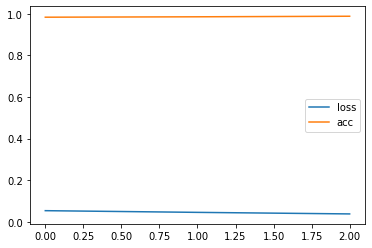

In [59]:
import pandas as pd
pd.DataFrame(history.history)
pd.DataFrame(history.history).plot.line() #범위가 작아서 이렇게 나옴..

accuracy =1 ,
- 100%맞는다는 의미 -> overfiting

In [60]:
model.evaluate(X_test,y_test) #일반화하고 성능 안좋음 

313/313 [==============================] - 1s 2ms/step - loss: 0.0829 - acc: 0.9765


[0.08285386860370636, 0.9764999747276306]

- early stopping: loss의 크기 변화가 크지 않으면 멈춤

In [ ]:
model.fit(X_train,y_train, epochs=100)

In [7]:
tf.keras.callbacks.EarlyStopping
tf.keras.callbacks.ReduceLROnPlateau() #고원현상 

- local minima ,saddle point에도 0 이 되는 지점이 있음
    - 실제로 dl은 수백개의 파라미터가 동시에 0 나오기 힘듦    
    - computational 미분으로 0은 없고 1보다 작으며 0에 가까운 수 사용 
        - 예. e-10

---
## fashion_mnist
### Keras를 사용한 ML 기본사항 
### 기본 이미지 분류 
참고 : https://www.tensorflow.org/tutorials/keras/classification?hl=ko
- fashion item 10가지
- 연습용 데이터는 hold-out되어 잇음 

- `load_data()` 함수를 호출하면 네 개의 넘파이(NumPy) 배열이 반환

- 모델 학습에 사용되는 훈련 세트: X_train,y_train
- 모델 테스트에 사용되는 테스트 세트 :X_test,y_test

In [86]:
(X_train, y_train), (X_test,y_test)=tf.keras.datasets.fashion_mnist.load_data() 

In [87]:
import matplotlib.pyplot as plt

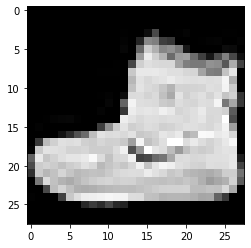

In [88]:
plt.imshow(X_train[0], cmap='gray')

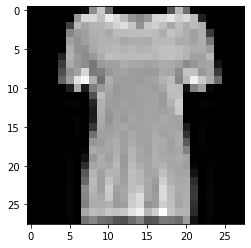

In [89]:
plt.imshow(X_train[10], cmap='gray')

- 이미지 크기 : 28x28 크기의 넘파이 배열
- 픽셀 값: 0~ 255(흑백이미지)

In [92]:
X_train.shape  , X_test.shape

((60000, 28, 28), (10000, 28, 28))

1. 데이터 확보
2. 데이터 갯수 알음
3. 데이터 EDA(Exploratory Data Analysis) 탐색적 데이터 분석
4. 6:1 분할
https://www.tensorflow.org/tutorials/keras/classification?hl=ko

In [93]:
import numpy as np

In [94]:
np.unique(y_train, return_counts=True) #총 10개의 items 가 각 6,000개씩 있음 (balanced data)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))

In [96]:
x,y=np.unique(y_train, return_counts=True) #총 10개의 items 가 각 6,000개씩 있음 (balanced data)

In [95]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

#### Label Encoding
- label: 0에서 9까지의 정수 배열 
- classs: 이미지에 있는 classs

In [99]:
data=pd.DataFrame(y.reshape(1,-1), columns=class_names)

In [100]:
data

,T-shirt/top,Trouser,Pullover,Dress,Coat,Sandal,Shirt,Sneaker,Bag,Ankle boot
0,6000,6000,6000,6000,6000,6000,6000,6000,6000,6000


### EDA
- 각 클래스별로 갯수 비교하여 전체적 비율 확인

<AxesSubplot:>

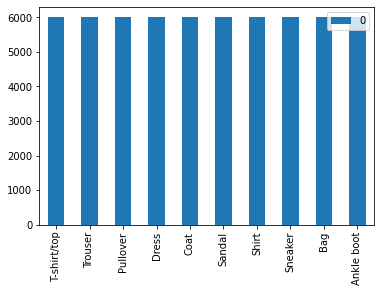

In [103]:
data.T.plot.bar() #balacned

### 정규화
- MinMaxScaler
- 0~255

In [ ]:
X_train=X_train/255 
X_test=X_test/255

#### Imbalanced dataset
- 수량이 더 많은 class 더 학습 성능이 좋음 
- compile( metrics=  [precision, recall] ) 
    - 혼동행렬